# Random Forest Model for Company dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data["highsales"] = np.where((data["Sales"]<9.32),"low","high")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [6]:
data["highsales"].value_counts()

low     298
high    102
Name: highsales, dtype: int64

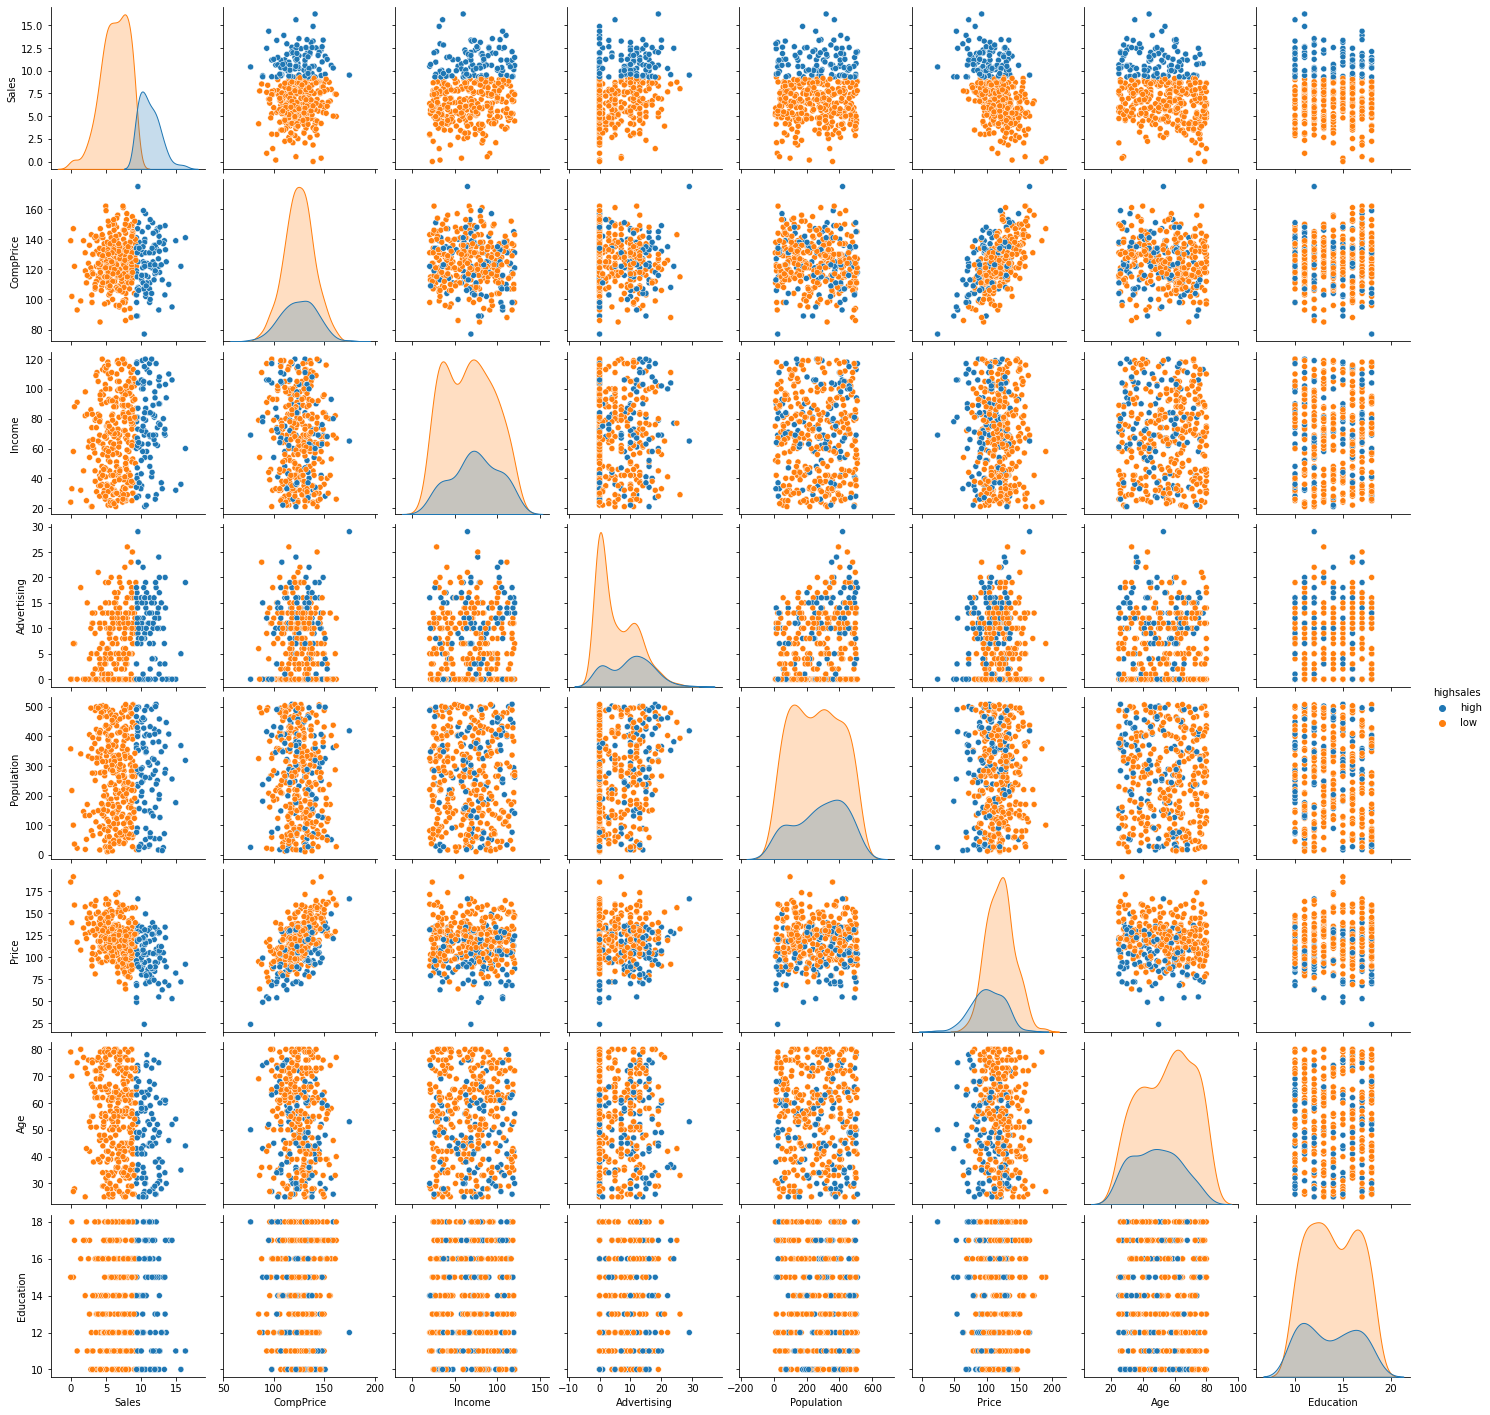

In [7]:
sns.pairplot(data, hue= 'highsales')

### One hot encoding

In [8]:
data1= pd.get_dummies(data, columns= ['Urban','US',"ShelveLoc"],drop_first=False)
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,highsales,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,high,0,1,0,1,1,0,0
1,11.22,111,48,16,260,83,65,10,high,0,1,0,1,0,1,0
2,10.06,113,35,10,269,80,59,12,high,0,1,0,1,0,0,1
3,7.40,117,100,4,466,97,55,14,low,0,1,0,1,0,0,1
4,4.15,141,64,3,340,128,38,13,low,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,high,0,1,0,1,0,1,0
396,6.14,139,23,3,37,120,55,11,low,1,0,0,1,0,0,1
397,7.41,162,26,12,368,159,40,18,low,0,1,0,1,0,0,1
398,5.94,100,79,7,284,95,50,12,low,0,1,0,1,1,0,0


### Label encoding 

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
labeled= LabelEncoder().fit_transform(data1["highsales"])
labeled

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [11]:
data1["highsales"]=labeled
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,highsales,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,0,0,1,0,1,1,0,0
1,11.22,111,48,16,260,83,65,10,0,0,1,0,1,0,1,0
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,0,1
3,7.40,117,100,4,466,97,55,14,1,0,1,0,1,0,0,1
4,4.15,141,64,3,340,128,38,13,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,0,1,0,1,0,1,0
396,6.14,139,23,3,37,120,55,11,1,1,0,0,1,0,0,1
397,7.41,162,26,12,368,159,40,18,1,0,1,0,1,0,0,1
398,5.94,100,79,7,284,95,50,12,1,0,1,0,1,1,0,0


In [12]:
X = data1.drop(columns=['highsales','Sales'], axis= 1)
Y = data1["highsales"]

In [13]:
data1["highsales"].unique()

array([0, 1])

In [14]:
data1["highsales"].value_counts()

1    298
0    102
Name: highsales, dtype: int64

#### Splitting data into training and testing 

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=40)

### Bagging Classifier

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [17]:
num_trees = 100

model = BaggingClassifier( max_samples=0.8,n_estimators=num_trees,random_state=8)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

0.8625


86.25 % Accuracy for whole data   i,e. model trained with whole data

In [18]:
num_trees = 100

model = BaggingClassifier( max_samples=0.8,n_estimators=num_trees,random_state=8)
model.fit(x_train,y_train)

pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.90      0.95      0.92        75

    accuracy                           0.88       100
   macro avg       0.85      0.81      0.83       100
weighted avg       0.88      0.88      0.88       100



88 % Accuracy for test data

### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
num_trees = 100
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

0.8800000000000001


88 % Accuracy for whole data

### AdaBoost Classifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
num_trees = 10
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.8,random_state=9)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

0.85


85 % Accuracy for whole data

### HyperParameter Tunning for Learning rate

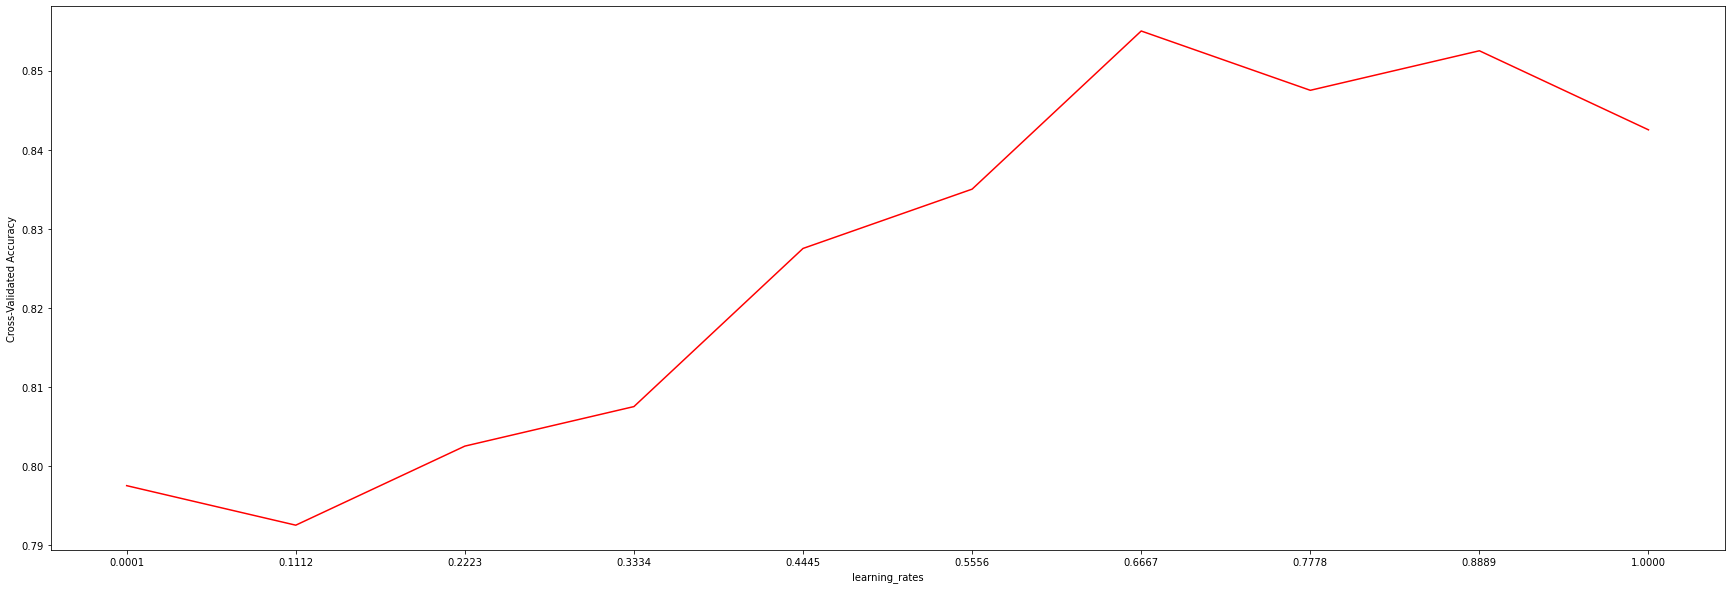

In [23]:
learning_rates = np.linspace(0.0001,1,10)
k_scores = []


# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for learning_rate in learning_rates:
    ab =  AdaBoostClassifier(n_estimators=num_trees, learning_rate= learning_rate, random_state=9)
    scores = cross_val_score(ab, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(30,10))
plt.plot(learning_rates, k_scores,color="red")


plt.xlabel('learning_rates')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(learning_rates)
plt.show()

In [24]:
k_scores

[0.7975,
 0.7925000000000001,
 0.8024999999999999,
 0.8074999999999999,
 0.8275,
 0.835,
 0.8549999999999999,
 0.8474999999999999,
 0.8525,
 0.8425]

85.5 % is the heighest accuracy

## Stacking Ensemble for Classification

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

#### Creating the sub models

In [26]:
kfold = KFold(n_splits=10)

estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

#### Creating the ensemble model by voting for best estimators

In [27]:
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=10)
print(results.mean())

0.8875


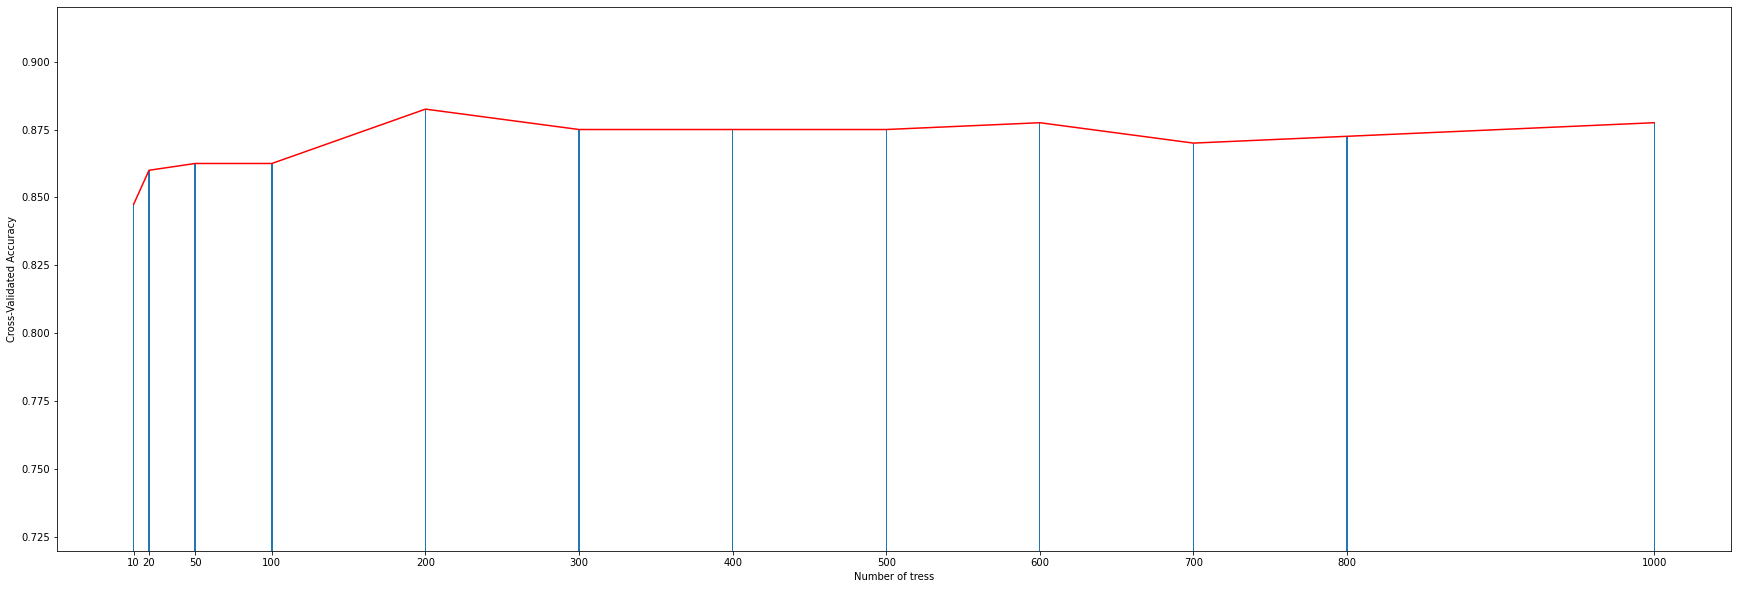

In [28]:
num_trees = [10,20,50,100,200,300,400,500,600,700,800,1000]
nf=[2,3,4,5,6]
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in num_trees:

    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X, Y, cv=10)
    k_scores.append(scores.mean())
#plot to see clearly
plt.figure(figsize=(30,10))
plt.bar(num_trees, k_scores)
plt.plot(num_trees, k_scores,color="red")

plt.xlabel('Number of tress')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(num_trees)
plt.ylim(0.72,0.92)
plt.show()

By seeing the above plot best k_value is 20

In [29]:
rf = RandomForestClassifier(n_estimators=20)
scores = cross_val_score(rf, X, Y, cv=10)
scores.mean()

0.8575000000000002

85 % Accuracy with N_estimators = 20